In [2]:
import pandas as pd
from pandas import DataFrame
from pandas import Series

In [3]:
import matplotlib.pyplot as plt

In [21]:
# Load data with read_excel function

df = pd.read_excel('C:/Users/kcw98/Desktop/Part 13~17 Project/01. Data anlaysis using advertisement data/Data/Naver_report.xls')

In [34]:
# head - Check if correct data
df.head()

,"캠페인보고서(2019.02.01.~2019.04.30.),ftasia",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6
0,광고그룹,키워드,노출수,클릭수,클릭률(%),"평균클릭비용(VAT포함,원)","총비용(VAT포함,원)"
1,올인원 패키지 : 디자인 툴_파워컨텐츠_포토샵,-,2319456,9606,0.414149,261.549,2512444
2,올인원 패키지 : 업무자동화_VBA,-,767491,8058,1.04991,295.975,2384965
3,ㅍAOP 전체_중복키워드_디자인(삭제),일러스트,1137840,324,0.028475,4841.66,1568699
4,올인원 패키지 : 데이터 분석 입문 온라인_파콘,-,694106,1863.6,0.268489,630.593,1175174


In [17]:
# Delete firt row using skiprows (Unneeded data) 
df=pd.read_excel('C:/Users/kcw98/Desktop/Part 13~17 Project/01. Data anlaysis using advertisement data/Data/Naver_report.xls', skiprows=[0])

# Head
df.head()

,광고그룹,키워드,노출수,클릭수,클릭률(%),"평균클릭비용(VAT포함,원)","총비용(VAT포함,원)"
0,올인원 패키지 : 디자인 툴_파워컨텐츠_포토샵,-,2319456,9606.0,0.414149,261.549448,2512444
1,올인원 패키지 : 업무자동화_VBA,-,767491,8058.0,1.049915,295.974808,2384965
2,ㅍAOP 전체_중복키워드_디자인(삭제),일러스트,1137840,324.0,0.028475,4841.663580,1568699
3,올인원 패키지 : 데이터 분석 입문 온라인_파콘,-,694106,1863.6,0.268489,630.593475,1175174
4,3. html,HTML,9626374,813.6,0.008452,1408.435349,1145903


In [38]:
# Delete multiple rows
df=pd.read_excel('C:/Users/kcw98/Desktop/Part 13~17 Project/01. Data anlaysis using advertisement data/Data/Naver_report.xls', skiprows=[0, 2, 4])

# Head
df.head()

,광고그룹,키워드,노출수,클릭수,클릭률(%),"평균클릭비용(VAT포함,원)","총비용(VAT포함,원)"
0,올인원 패키지 : 업무자동화_VBA,-,767491,8058.0,1.049915,295.974808,2384965
1,올인원 패키지 : 데이터 분석 입문 온라인_파콘,-,694106,1863.6,0.268489,630.593475,1175174
2,3. html,HTML,9626374,813.6,0.008452,1408.435349,1145903
3,6. 파이썬,파이썬,384522,260.4,0.067720,3705.360983,964876
4,1. 코딩,코딩,562162,271.2,0.048242,3243.215339,879560


In [22]:
# Check missing data
df.isnull()

,"캠페인보고서(2019.02.01.~2019.04.30.),ftasia",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
1377,False,False,False,False,False,False,False
1378,False,False,False,False,False,False,False
1379,False,False,False,False,False,False,False
1380,False,False,False,False,False,False,False


In [23]:
# Check missing data (Missing data) column unit - MAINLY USED
df.isnull().sum()

캠페인보고서(2019.02.01.~2019.04.30.),ftasia    0
Unnamed: 1                                0
Unnamed: 2                                0
Unnamed: 3                                0
Unnamed: 4                                0
Unnamed: 5                                0
Unnamed: 6                                0
dtype: int64

In [24]:
# Check missing data (Missing data) row by row
df.isnull().sum(axis=1)

0       0
1       0
2       0
3       0
4       0
       ..
1377    0
1378    0
1379    0
1380    0
1381    0
Length: 1382, dtype: int64

### Handling column-level numerical operations and data types of data frames
- Number of clicks (rounded, changed to one's digit)
- Click rate
- Average click cost (VAT included, KRW)

- Number of clicks: An indicator showing the total number of clicks made
- => Rounding processing, change to one's digit (because there should not be a decimal point)

In [40]:
# Apply round function to click count row
clk = round(df['클릭수'],0)
clk

0       8058.0
1       1864.0
2        814.0
3        260.0
4        271.0
         ...  
1374       0.0
1375       0.0
1376       0.0
1377       0.0
1378       0.0
Name: 클릭수, Length: 1379, dtype: float64

In [42]:
# Remove decimal point = float (float) => integer (int)
clk.astype(int)

0       8058
1       1864
2        814
3        260
4        271
        ... 
1374       0
1375       0
1376       0
1377       0
1378       0
Name: 클릭수, Length: 1379, dtype: int32

In [44]:
# Replace existing column data
df['클릭수'] = clk.astype(int)

# head
df.head()

,광고그룹,키워드,노출수,클릭수,클릭률(%),"평균클릭비용(VAT포함,원)","총비용(VAT포함,원)"
0,올인원 패키지 : 업무자동화_VBA,-,767491,8058,1.049915,295.974808,2384965
1,올인원 패키지 : 데이터 분석 입문 온라인_파콘,-,694106,1864,0.268489,630.593475,1175174
2,3. html,HTML,9626374,814,0.008452,1408.435349,1145903
3,6. 파이썬,파이썬,384522,260,0.067720,3705.360983,964876
4,1. 코딩,코딩,562162,271,0.048242,3243.215339,879560


- Click through rate: CTR = number of clicks / number of impressions * 100
- => The number of clicks has changed, so the existing click-through rate (%) column data needs to be changed.

In [45]:
# Columns of a data frame can perform numerical operations on each other
df['클릭수']/df['노출수']*100

# head
df.head()

,광고그룹,키워드,노출수,클릭수,클릭률(%),"평균클릭비용(VAT포함,원)","총비용(VAT포함,원)"
0,올인원 패키지 : 업무자동화_VBA,-,767491,8058,1.049915,295.974808,2384965
1,올인원 패키지 : 데이터 분석 입문 온라인_파콘,-,694106,1864,0.268489,630.593475,1175174
2,3. html,HTML,9626374,814,0.008452,1408.435349,1145903
3,6. 파이썬,파이썬,384522,260,0.067720,3705.360983,964876
4,1. 코딩,코딩,562162,271,0.048242,3243.215339,879560


In [46]:
df['클릭률(%)'] = df['클릭수']/df['노출수']*100

# head
df.head()

,광고그룹,키워드,노출수,클릭수,클릭률(%),"평균클릭비용(VAT포함,원)","총비용(VAT포함,원)"
0,올인원 패키지 : 업무자동화_VBA,-,767491,8058,1.049915,295.974808,2384965
1,올인원 패키지 : 데이터 분석 입문 온라인_파콘,-,694106,1864,0.268547,630.593475,1175174
2,3. html,HTML,9626374,814,0.008456,1408.435349,1145903
3,6. 파이썬,파이썬,384522,260,0.067616,3705.360983,964876
4,1. 코딩,코딩,562162,271,0.048207,3243.215339,879560


- Average click cost: indicated in the column name in won units
    - => Rounding processing, change to one's digit

In [47]:
# Create cpc variable
cpc = round(df['평균클릭비용(VAT포함,원)'],0)
df['평균클릭비용(VAT포함,원)'] = cpc.astype(int)

# head
df.head()

,광고그룹,키워드,노출수,클릭수,클릭률(%),"평균클릭비용(VAT포함,원)","총비용(VAT포함,원)"
0,올인원 패키지 : 업무자동화_VBA,-,767491,8058,1.049915,296,2384965
1,올인원 패키지 : 데이터 분석 입문 온라인_파콘,-,694106,1864,0.268547,631,1175174
2,3. html,HTML,9626374,814,0.008456,1408,1145903
3,6. 파이썬,파이썬,384522,260,0.067616,3705,964876
4,1. 코딩,코딩,562162,271,0.048207,3243,879560


In [48]:
# unique() - Unique values ​​of a column (series)
df['광고그룹'].unique()

array(['올인원 패키지 : 업무자동화_VBA', '올인원 패키지 : 데이터 분석 입문 온라인_파콘', '3. html',
       '6. 파이썬', '1. 코딩', '2. C언어 일반', '프로그래밍 전체_파워컨텐츠_블록체인(삭제)',
       'AOP 전체_중복키워드_디자인', '디지털 마케팅 스쿨 13기_대표키워드', '인스타그램 마케팅',
       '블록체인 신사업 시작하기', 'AOP 전체_중복키워드_비지니스', '올인원 패키지 : 업무자동화_2. 파이썬',
       '올인원 패키지 : 1인 쇼핑몰 시작하기_00.창업_PC', '올인원 패키지 : 영상 제작/편집_6.프리미어프로',
       '1. 모바일앱개발_교육', '올인원 패키지 : UX/UI 디자인 입문_연관검색어',
       '올인원 패키지 : 데이터 분석 입문(파컨)', '올인원 패키지 : 디자인 툴_파워컨텐츠_포토샵',
       'JavaScript BOOT CAMP', '1. 일반_PC', 'ㅍAOP 전체_중복키워드_디자인(삭제)',
       'AOP 전체_중복키워드_공통', 'AOP 전체_중복키워드_프로그래밍', '003.퍼포먼스 마케팅',
       '2. 프로그래밍', '마케팅 유치원', '올인원 패키지 : 업무자동화_1. 자동화', '올인원 패키지 : 브랜딩',
       'ㅍ올인원 패키지 : 브랜딩', '올인원 패키지 : 콘텐츠 마케팅_카피라이팅',
       'AOP 전체_중복키워드_데이터사이언스', '8. 시스템 프로그래밍',
       'ㅍ올인원 패키지 : UX/UI 디자인 입문_연관검색어(삭제)', '올인원 패키지 : 프로그래밍 첫걸음 시작하기',
       '페이스북&인스타그램 마케팅 실전', 'Python & Django를 활용한 웹 서비스_개발자', '5. 자료구조',
       'fin_camp_auction_6', '올인원 패키지 : 1인 쇼핑몰_00.창업_MO', '타이포그래피와 편집디자인',
       '올인원 패키

In [49]:
len(df['키워드'].unique())

1112

In [50]:
# value_counts() -  Frequency of unique values ​​in a column
df['광고그룹'].value_counts()

올인원 패키지 : 업무자동화_3. 엑셀            93
AOP 전체_중복키워드_디자인                 57
#000_마케팅 전체_main                 48
ㅍAOP 전체_중복키워드_디자인(삭제)            45
1. 전체                            26
                                 ..
올인원 패키지 : 데이터 분석 입문(파컨)           1
웹 프로그래밍 스쿨 10기_기존 키워드             1
올인원 패키지 : 1인 쇼핑몰 시작하기_04.호스팅사     1
쉽고 재미있는 재무제표 분석 17기               1
올인원 패키지 : 영상 제작/편집_7.에프터이펙트       1
Name: 광고그룹, Length: 186, dtype: int64

In [51]:
# sort_values() - sort (defualt: ascending)
# Sort by number of impressions
df['노출수'].sort_values()

1055       1001
443        1003
595        1005
981        1006
440        1007
         ...   
46      1021846
11      1470452
7       1887822
171     3095998
2       9626374
Name: 노출수, Length: 1379, dtype: int64

In [52]:
# sort_values() - sort in descending order (ascending=False)
# Sort by number of impressions
df['노출수'].sort_values(ascending=False)

2       9626374
171     3095998
7       1887822
11      1470452
46      1021846
         ...   
440        1007
981        1006
595        1005
443        1003
1055       1001
Name: 노출수, Length: 1379, dtype: int64

In [53]:
# sort_values() - sort in descending order (ascending=False)
# Sort by number of clicks
df['클릭수'].sort_values(ascending=False)

0       8058
6       2838
81      2798
24      2536
12      2098
        ... 
1160       0
1159       0
1158       0
1157       0
1378       0
Name: 클릭수, Length: 1379, dtype: int32

# Data exploration through visualization
### - Learning Objectives:
### 1. Data visualization by processing data from business
### 2. Process and process data to visualize

### Chapter1 - 03. matplotlib
### series visualization

In [54]:
# 노출수 column visualisation
# dataframe visualisation <-> series visualisation
# type function
type(df['노출수'])

pandas.core.series.Series

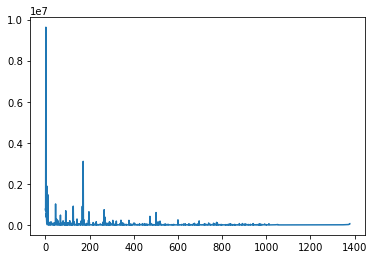

In [55]:
# plotting
df['노출수'].plot()
plt.show()

### - Visualize data to see clear patterns
1. as-is: Output based on index (the x-axis of the graph is the index of the series)
2. to-be: Output based on sorted value
        2-1. Sort the values ​​of the series in ascending numerical order.
        2-2. Visualization after re-creating the index according to the type of sorted data

In [58]:
# 2-1. Sort the values ​​of the series in ascending numerical order.
# Impressions column, sort_values()
imp_sort = df['노출수'].sort_values()
imp_sort

1055       1001
443        1003
595        1005
981        1006
440        1007
         ...   
46      1021846
11      1470452
7       1887822
171     3095998
2       9626374
Name: 노출수, Length: 1379, dtype: int64

In [59]:
# reset_index() - Recreate index, return existing index to column of data frame
imp_sort = imp_sort.reset_index()
imp_sort

,index,노출수
0,1055,1001
1,443,1003
2,595,1005
3,981,1006
4,440,1007
...,...,...
1374,46,1021846
1375,11,1470452
1376,7,1887822
1377,171,3095998


In [60]:
# drop('index to delete', axis=1) - delete (by column)
# Does not affect original data (original appears when imp_sort prints)
imp_sort.drop('index', axis=1)
imp_sort

,index,노출수
0,1055,1001
1,443,1003
2,595,1005
3,981,1006
4,440,1007
...,...,...
1374,46,1021846
1375,11,1470452
1376,7,1887822
1377,171,3095998


In [61]:
# inplace=True (command to transform the original)
imp_sort.drop('index', axis=1, inplace=True)
imp_sort

,노출수
0,1001
1,1003
2,1005
3,1006
4,1007
...,...
1374,1021846
1375,1470452
1376,1887822
1377,3095998


C:\Users\kcw98\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 45432 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\kcw98\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 52636 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\kcw98\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\kcw98\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 45432 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\kcw98\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 52636 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\kcw98\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 49688 missing from curre

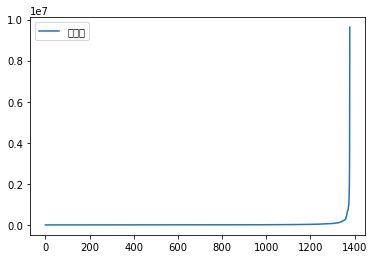

In [62]:
# imp_sort plotting
imp_sort.plot()
plt.show()

C:\Users\kcw98\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 53364 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\kcw98\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 47533 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\kcw98\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\kcw98\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 53364 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\kcw98\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 47533 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\kcw98\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 49688 missing from curre

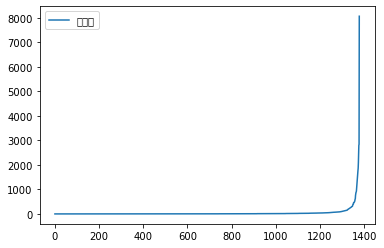

In [63]:
# 클릭 수 column visualisation
# sort_values(), reset_index(), drop('index', axis=1), plot - one-line coding (using parentheses)
((((df['클릭수'].sort_values())).reset_index()).drop('index', axis=1)).plot()
plt.show()

C:\Users\kcw98\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 52509 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\kcw98\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 48708 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\kcw98\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 50857 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\kcw98\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 54252 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\kcw98\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 54632 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\kcw98\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 50896 missing from c

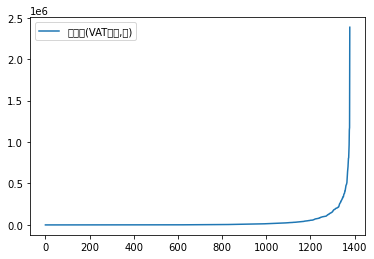

In [64]:
# Total cost visualization
((((df['총비용(VAT포함,원)'].sort_values())).reset_index()).drop('index', axis=1)).plot()
plt.show()

# data analysis
### - Objectives:
        1. Data analysis using python & pandas

## Extract key management keywords
### - Extract the top 5% keywords based on number of impressions and clicks
        1. Find the 95th percentile (quantile function used)
        2. Extract impressions above the 95th percentile (top 5%)
        3. Extract keywords corresponding to the top 5%

In [65]:
# Assign the number of impressions to the column imp variable
imp=df['노출수']

In [66]:
# quantile - Quantile output (default: 2nd quartile (median))
imp.quantile()

3801.0

In [67]:
# median - Median
imp.median()

3801.0

In [68]:
# quantile(0) - Ninimum
print(imp.quantile(0))
print(imp.min())

1001.0
1001


In [69]:
# quantile(1) - Maximum
print(imp.quantile(1))
print(imp.max())

9626374.0
9626374


In [70]:
# Find the 95th percentile
imp.quantile(0.95)

82331.39999999998

In [73]:
# 2. Extract impressions above the 95th percentile (top 5%)
# series[condition]
imp = imp[imp>imp.quantile(0.95)]
imp

2    9626374
Name: 노출수, dtype: int64

In [74]:
# 3. Extract keywords corresponding to the top 5%
    # 1. as-is: Output based on index (the x-axis of the graph is the index of the series)
    # 2. to-be: Output based on sorted values

In [75]:
# Change dataframe index to keyword
# set_index('키워드')
df_index = df.set_index('키워드')
df_index

,광고그룹,노출수,클릭수,클릭률(%),"평균클릭비용(VAT포함,원)","총비용(VAT포함,원)"
키워드,,,,,,
-,올인원 패키지 : 업무자동화_VBA,767491,8058,1.049915,296,2384965
-,올인원 패키지 : 데이터 분석 입문 온라인_파콘,694106,1864,0.268547,631,1175174
HTML,3. html,9626374,814,0.008456,1408,1145903
파이썬,6. 파이썬,384522,260,0.067616,3705,964876
코딩,1. 코딩,562162,271,0.048207,3243,879560
...,...,...,...,...,...,...
엑셀셀서식,올인원 패키지 : 업무자동화_3. 엑셀,24016,0,0.000000,0,0
MATCH,올인원 패키지 : 업무자동화_3. 엑셀,32287,0,0.000000,0,0
LTV,마케팅KPI수립,32602,0,0.000000,0,0


In [77]:
# Create imp variable from df_index and quantile(0.95)
imp = df_index['노출수']


In [76]:
# Output imp variable, extract keywords from top 5% of impressions
imp = imp[imp>=imp.quantile(0.95)]
imp

2    9626374
Name: 노출수, dtype: int64

In [78]:
# Extract top 5% clicked keywords from df_index
clk = df_index['클릭수']
clk = clk[clk>=clk.quantile(0.95)]
clk

키워드
-          8058
-          1864
HTML        814
파이썬         260
코딩          271
           ... 
재태크         126
모스자격증       198
펀드하는법       248
채권투자        136
주식투자하는법     120
Name: 클릭수, Length: 69, dtype: int32

### Selection of key management keywords
### - Above the 95th percentile for both impressions and clicks

### When there are multiple conditions
### - dataframe[(conditional statement)&(conditional statement)]

In [80]:
# Create imp and clk variables in df_index
imp = df_index['노출수']
clk = df_index['클릭수']

In [81]:
# Extract the top 5% for both impressions and clicks
result = df_index[(imp>=imp.quantile(0.95))&(clk>=clk.quantile(0.95))]
result

,광고그룹,노출수,클릭수,클릭률(%),"평균클릭비용(VAT포함,원)","총비용(VAT포함,원)"
키워드,,,,,,
-,올인원 패키지 : 업무자동화_VBA,767491,8058,1.049915,296,2384965
-,올인원 패키지 : 데이터 분석 입문 온라인_파콘,694106,1864,0.268547,631,1175174
HTML,3. html,9626374,814,0.008456,1408,1145903
파이썬,6. 파이썬,384522,260,0.067616,3705,964876
코딩,1. 코딩,562162,271,0.048207,3243,879560
C언어,2. C언어 일반,271370,154,0.056749,5269,809358
가상화폐,프로그래밍 전체_파워컨텐츠_블록체인(삭제),91369,2838,3.106086,283,803770
포토샵,AOP 전체_중복키워드_디자인,1887822,394,0.020871,1914,753247
블록체인,블록체인 신사업 시작하기,200243,236,0.117857,2722,643478


In [82]:
# index - Output key management keywords
result.index

Index(['-', '-', 'HTML', '파이썬', '코딩', 'C언어', '가상화폐', '포토샵', '블록체인', '엑셀', '-',
       '포토샵', '컴퓨터활용능력', '컴퓨터활용능력2급', '컴퓨터활용능력1급', '포토샵', '-', '프리미어프로', '폰트',
       '스케치', '포토샵', '글씨체', '한글폰트', '마블', '바이럴마케팅'],
      dtype='object', name='키워드')

### 저효율 키워드 선별

C:\Users\kcw98\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 45432 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\kcw98\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 52636 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\kcw98\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\kcw98\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 45432 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\kcw98\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 52636 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\kcw98\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 49688 missing from curre

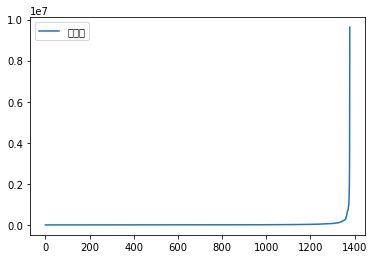

In [83]:
# Impressions line graph
imp_sort.plot()
plt.show()

#### - Keywords that cost a lot of money even though they are not in the top 5% in terms of number of impressions and clicks
        1. Impressions below the 95th percentile
        2. Clicks below the 95th percentile
        3. Total cost above 85th percentile
        4. Total cost below the 95th percentile

### When there are multiple conditions
    - dataframe[(conditional statement)&(conditional statement)]

In [84]:
# Create cost variable with df_index
cost = df_index['총비용(VAT포함,원)']

# dataframe[(conditional statement)&(conditional statement)]
result = df_index[(imp<imp.quantile(0.95))&(clk<clk.quantile(0.95))&(cost>=cost.quantile(0.85))&(cost<cost.quantile(0.95))]

# print index
result.index

Index(['온라인마케팅교육', '온라인마케팅', '어플제작비용', '부동산경매', '퍼포먼스마케팅', 'C++', '게임만드는프로그램',
       '엑셀배우기', '앱만들기', '영상제작', '쇼핑몰제작', '에프터이펙트', '어플리케이션제작', '강남빌딩매매',
       '웹디자인', '디지털마케팅', '포토샵강의', '구글애널리틱스자격증', 'PYTHON', '페이스북광고', '유튜브마케팅',
       '게임제작', '부동산투자', '마케팅전략', 'PYTHON', '홈페이지만들기', 'B2B사이트', 'JAVASCRIPT',
       '파이썬강좌', '인스타그램광고', '동영상제작', 'SEO', '쇼핑몰창업', '인터넷쇼핑몰', '게임프로그래밍학원',
       '프로그래밍', '서울빌딩매매', '데이터사이언스', '모바일게임제작', '엑셀학원', '유튜브크리에이터', '엑셀VBA',
       '영상편집학원', '텐서플로우', '쇼핑몰홈페이지제작', '엑셀교육', '그로스해킹', '게임개발', '광고대행사',
       '통계학원', '모바일앱개발', '안드로이드앱만들기', '파이썬기초', '하이브리드앱', '온라인마케팅', '인디자인',
       '검색엔진최적화', '엑셀실무', '인터넷쇼핑몰제작', '상가빌딩매매', '퍼포먼스마케팅', '쇼핑몰', 'UX디자인',
       '유니티강좌', 'VBA', '코딩이란', 'SNS마케팅', 'GA자격증', '콘텐츠제작', '구글애널리틱스', 'UI디자인',
       '1인미디어', '포토샵자격증', '하이브리드앱', '포토샵자격증', '브랜드네이밍', '리플렛디자인', '데이터사이언티스트',
       '유니티3D', '자바스크립트', '일러스트레이터강좌', '데이터분석준전문가', '유튜브편집', '모션그래픽', '리플렛디자인',
       'SPRING', '어도비일러스트레이터', 'SNS광고', '쇼핑몰촬영', '브랜드마케팅', '데이터분석', 'PHP',
    